In [ ]:
! pip install pytorch-nlp
! pip install pytorch-transformers
! pip install ktrain

In [ ]:
import numpy as np
import torch.nn as nn
import pandas as pd
import torch
from pytorch_transformers import XLNetForSequenceClassification, XLNetTokenizer, AdamW, WarmupLinearSchedule
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
torch.set_default_tensor_type('torch.cuda.FloatTensor')
import ktrain
from ktrain import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
#nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords 
stop_words = stopwords.words('english')
device = torch.device("cuda")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **READING DATA**

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Project_2')

In [ ]:
train_= pd.read_csv("/content/drive/My Drive/Project_2/train.tsv",sep="\t")
train_.head()

,tweet_id,label
0,1256007275807997953,0
1,1257909427677601792,0
2,1281580572415066112,0
3,1271348112733470720,0
4,1270421287148695556,0


In [ ]:
valid_= pd.read_csv("/content/drive/My Drive/Project_2/valid.tsv",sep="\t")
valid_.head()

,tweet_id,label
0,1279974120902590466,0
1,1282343525078663168,0
2,1278069425472704512,0
3,1274677343680946176,1
4,1270626757327151105,0


In [ ]:

# #get all text files
# from pathlib import Path
# train_folder = Path("/content/drive/My Drive/Project_2/text_files/train/").rglob('*.txt')
# valid_folder = Path("/content/drive/My Drive/Project_2/text_files/valid/").rglob('*.txt')
# #####DONOT RUN THIS IF NOT NEEDED

# train_files = [x for x in train_folder]
# valid_files = [x for x in valid_folder]


'\n#get all text files\nfrom pathlib import Path\ntrain_folder = Path("/content/drive/My Drive/Project_2/text_files/train/").rglob(\'*.txt\')\nvalid_folder = Path("/content/drive/My Drive/Project_2/text_files/valid/").rglob(\'*.txt\')\n#####DONOT RUN THIS IF NOT NEEDED\n\ntrain_files = [x for x in train_folder]\nvalid_files = [x for x in valid_folder]\n'

In [ ]:
#files

In [ ]:

# Getting text from files
# train_content = {}
# for name in train_files:
#     f = open(name, 'r')
#     name = name.stem
#     train_content[name] = f.readlines()
#     #print(f.readlines())
#     f.close()

# valid_content = {}
# for name in valid_files:
#     f = open(name, 'r')
#     name = name.stem
#     valid_content[name] = f.readlines()
#     #print(f.readlines())
#     f.close()


"\ntrain_content = {}\nfor name in train_files:\n    f = open(name, 'r')\n    name = name.stem\n    train_content[name] = f.readlines()\n    #print(f.readlines())\n    f.close()\n\nvalid_content = {}\nfor name in valid_files:\n    f = open(name, 'r')\n    name = name.stem\n    valid_content[name] = f.readlines()\n    #print(f.readlines())\n    f.close()\n"

In [ ]:
#valid_content

In [ ]:
# Making dataframe from dictionary
# train_df = pd.DataFrame(list(train_content.items()),columns = ['tweet_id','text'])
# valid_df = pd.DataFrame(list(valid_content.items()),columns = ['tweet_id','text'])


"\ntrain_df = pd.DataFrame(list(train_content.items()),columns = ['tweet_id','text'])\nvalid_df = pd.DataFrame(list(valid_content.items()),columns = ['tweet_id','text'])\n"

In [ ]:
#valid_df

In [ ]:
def convert_df(df1):
  df1['tweet_id'] = df1['tweet_id'].astype(np.int64)
  #df['text'] = df ['text'].astype(str)
  df1.text = df1.text.apply(lambda x: str(x))
  return df1

In [ ]:
#df['text']

In [ ]:
def merge_label(df1,label_):
  df1 = pd.merge(df1,label_ , on="tweet_id")
  df1.text = df1.text.apply(lambda x: str(x))
  return df1

In [ ]:
#df_['text']

In [ ]:
#df_.head(), train_.shape, df.shape, df_.shape

SAVING TO FILE

In [ ]:
# Dataframe -> CSV and storing in drive
# train_df = convert_df(train_df)
# valid_df = convert_df(valid_df)

# train_df

# train_df = merge_label(train_df,train_)
# valid_df = merge_label(valid_df,valid_)

# #save_colab(df,org_text.csv)
# train_df.to_csv('train_df.csv')
# !cp train_df.csv "/content/drive/My Drive/Project_2/"
# valid_df.to_csv('valid_df.csv')
# !cp valid_df.csv "/content/drive/My Drive/Project_2/"


'\ntrain_df = convert_df(train_df)\nvalid_df = convert_df(valid_df)\n\ntrain_df\n\ntrain_df = merge_label(train_df,train_)\nvalid_df = merge_label(valid_df,valid_)\n\n#save_colab(df,org_text.csv)\ntrain_df.to_csv(\'train_df.csv\')\n!cp train_df.csv "/content/drive/My Drive/Project_2/"\nvalid_df.to_csv(\'valid_df.csv\')\n!cp valid_df.csv "/content/drive/My Drive/Project_2/"\n'

In [ ]:
#valid_df

## **LOADING FROM FILE**

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Project_2/train_df.csv")
df_ = pd.read_csv("/content/drive/My Drive/Project_2/valid_df.csv")

In [ ]:
df_

,Unnamed: 0,tweet_id,text,label
0,0,1261958095502221312,"[""At a graduation event, former US President B...",1
1,1,1270364781489373187,"[""Murcia turns green in tribute to the 'indisp...",0
2,2,1263604531872649216,"['Hello, my friends!\n', '\n', 'If the Alarma ...",0
3,3,1265279665943523328,['@tonimdrd82 @Miotroyo2parte @Santi_ABASCAL @...,0
4,4,1261082283911589888,"['Thanks to @TvPlataforma, we finally know who...",0
...,...,...,...,...
1995,1995,1260254592220225536,['@Lineamadrid I went to pick up my mask with ...,0
1996,1996,1267780530877214720,"[""@PabloFuente Virus CONTROL,I'm afraid they w...",0
1997,1997,1262648936600346625,"[""The Balearic Public Prosecutor's Office file...",0
1998,1998,1269538241277018112,"['You have forgotten a ""small"" detail.\n', 'A ...",0


# **BASIC DATA PRE-PROCESSING**

In [ ]:
def pp(df1):
  #df['mod_text'] = df['text'].replace('\d+', '')
  df1['mod_text'] = df1['text'].apply(lambda x: x[2:-2]) #Removing brackets
  df1['mod_text'] = df1['mod_text'].str.replace('#','') #\S -> Non space character being removed.
  df1['mod_text'] = df1['mod_text'].str.replace('@(\S+) ','') #Removing hastags and username and tags
  df1['mod_text'] = df1['mod_text'].str.replace('https:\S+','') #Removing url
  df1['mod_text'] = df1['mod_text'].str.replace(r'\s+|\\n', ' ', regex=True) #Removing next line
  df1['mod_text'] = df1['mod_text'].str.replace('[^a-zA-Z0-9]',' ')
  #df1['final'] = df1['mod_text'].str.rstrip('\n')
  #df1['final'] = df1['final'].str.replace(' +', '')
  #df['mod_text'] = df['mod_text'].apply(lambda x: x[2:-2])
  tokenized_doc = df1['mod_text'].apply(lambda x: x.split())
  tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
  detokenized_doc = [] 
  for i in range(len(df1)): 
    t = ' '.join(tokenized_doc[i]) 
    detokenized_doc.append(t) 
  df1['final'] = detokenized_doc

In [ ]:
pp(df)
pp(df_)

In [ ]:
print(df['final'][69])
print (df['text'][69]) 
print(df_['final'][61])
print (df_['text'][61])
print (df_['tweet_id'][61])

A pandemic Three months without playing still KING Simply put Leo Messi
['🦠 A pandemic \n', '⚽ Three months without playing....\n', '👑 but he is still the KING. \n', '\n', '💙❤ Simply put, Leo Messi https://t.co/5JwCDwmJRh']
The good thing going outside mask covers half face I half ugly usual All advantages
["The good thing about going outside with a mask is that it covers half of my face and I'm half as ugly as usual.\n", '\n', 'All advantages 🧐']
1261822879680864256


In [ ]:
df.final=df.final.apply(str)
df_.final=df_.final.apply(str)


vectorizer = TfidfVectorizer(max_features = 64000, ngram_range=(1,4))
df_text = vectorizer.fit_transform(df.final)
df__text = vectorizer.fit_transform(df_.final)

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range=(1,4)).fit(df.final)
df_vect = vect.transform(df.final)
df__vect = vect.transform(df_.final)

In [ ]:
test = pd.DataFrame()
test['index'] = df_['tweet_id']

# **SVC**

In [ ]:
from sklearn.svm import SVC
svc =SVC(kernel='linear',tol=0.001,C=1)
svc.fit(df_vect,df['label'])
pred = svc.predict(vect.transform(df_.final))

In [ ]:
print('SVC AS ',accuracy_score(df_.label,pred))
print('SVC PS ',precision_score(df_.label,pred))
print(confusion_matrix(df_.label,pred))

SVC AS  0.8525
SVC PS  0.9504950495049505
[[1513   10]
 [ 285  192]]


In [ ]:
test['SVC'] = pred

# **MNB**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(df_vect,df['label'])
pred = MNB.predict(df__vect)

print('MNB AS ',accuracy_score(df_.label,pred))
print('MNB PS ',precision_score(df_.label,pred))
print(confusion_matrix(df_.label,pred))
test['MNB'] = pred

MNB AS  0.806
MNB PS  0.9158878504672897
[[1514    9]
 [ 379   98]]


# **RFC**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(df_vect,df['label'])
pred = RFC.predict(df__vect)

print('RFC AS ',accuracy_score(df_.label,pred))
print('RFC PS ',precision_score(df_.label,pred))
print(confusion_matrix(df_.label,pred))
test['RFC'] = pred

RFC AS  0.848
RFC PS  0.9576719576719577
[[1515    8]
 [ 296  181]]


# **GFC**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier()
GBC.fit(df_vect,df['label'])
pred = GBC.predict(df__vect)

print('GBC AS ',accuracy_score(df_.label,pred))
print('GBC PS ',precision_score(df_.label,pred))
print(confusion_matrix(df_.label,pred))
test['GBC'] = pred

GBC AS  0.8675
GBC PS  0.9491525423728814
[[1511   12]
 [ 253  224]]


# **PREPARING DATASET FOR PRETRAINED MODELS**

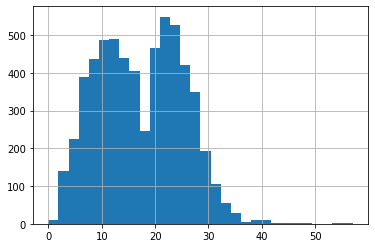

In [ ]:
seq_len = [len(i.split()) for i in df['final']]
pd.Series(seq_len).hist(bins = 30)

In [ ]:
print('Training Set:',df['label'].value_counts(normalize = True))
print('Test Set:',df_['label'].value_counts(normalize = True))

Training Set: 0    0.767833
1    0.232167
Name: label, dtype: float64
Test Set: 0    0.7615
1    0.2385
Name: label, dtype: float64


In [ ]:
categories = [0,1]
train_text,test_text,train_label,test_label = train_test_split(df['final'], df['label'], 
random_state=20, test_size=0.3, stratify=df['label'])


In [ ]:
train_x_ = np.array(train_text)
train_y_ = np.array(train_label)
test_x_ = np.array(test_text)
test_y_ = np.array(test_label)

# **BERT**

In [ ]:
MODEL_NAME = 'bert-base-cased'
t = text.Transformer(MODEL_NAME, maxlen=65, class_names=categories)
trn = t.preprocess_train(train_x_, train_y_)
val = t.preprocess_test(test_x_, test_y_)
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=32)

preprocessing train...
language: en
train sequence lengths:
	mean : 17
	95percentile : 30
	99percentile : 35


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 17
	95percentile : 30
	99percentile : 34


simulating training for different learning rates... this may take a few moments...
Epoch 1/4
131/131 [==============================] - 63s 396ms/step - loss: 0.5831 - accuracy: 0.7624
Epoch 2/4
131/131 [==============================] - 54s 413ms/step - loss: 0.5200 - accuracy: 0.7826
Epoch 3/4
131/131 [==============================] - 55s 419ms/step - loss: 2.7895 - accuracy: 0.6809
Epoch 4/4
131/131 [==============================] - 4s 26ms/step - loss: 8.5449 - accuracy: 0.6422


done.
Visually inspect loss plot and select learning rate associated with falling loss


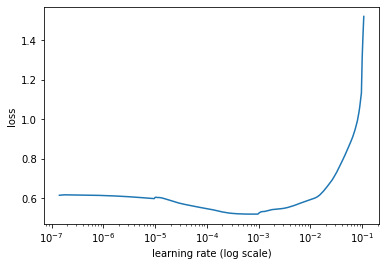

In [ ]:
learner.lr_find(show_plot=True, max_epochs=4)

In [ ]:
learner.autofit(4e-5, 10)



begin training using triangular learning rate policy with max lr of 4e-05...
Epoch 1/10
132/132 [==============================] - 75s 486ms/step - loss: 0.4447 - accuracy: 0.8212 - val_loss: 0.2650 - val_accuracy: 0.9089
Epoch 2/10
132/132 [==============================] - 65s 484ms/step - loss: 0.2236 - accuracy: 0.9274 - val_loss: 0.2237 - val_accuracy: 0.9267
Epoch 3/10
132/132 [==============================] - 65s 483ms/step - loss: 0.1505 - accuracy: 0.9533 - val_loss: 0.2013 - val_accuracy: 0.9328
Epoch 4/10
132/132 [==============================] - 65s 484ms/step - loss: 0.1048 - accuracy: 0.9664 - val_loss: 0.2008 - val_accuracy: 0.9394
Epoch 5/10
132/132 [==============================] - 64s 483ms/step - loss: 0.0579 - accuracy: 0.9833 - val_loss: 0.2065 - val_accuracy: 0.9439
Epoch 6/10
132/132 [==============================] - 65s 484ms/step - loss: 0.0372 - accuracy: 0.9890 - val_loss: 0.2408 - val_accuracy: 0.9406
Epoch 7/10
132/132 [==============================]

In [ ]:
learner.validate(class_names=t.get_classes())

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1382
           1       0.88      0.88      0.88       418

    accuracy                           0.94      1800
   macro avg       0.92      0.92      0.92      1800
weighted avg       0.94      0.94      0.94      1800



array([[1333,   49],
       [  52,  366]])

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=t)
count = 0
pred = []
for i in range(len(df_)):
  pred.append(predictor.predict(df_.final[i]))
  if (i % 50 == 0):
    print(i)
  #print(i,end = ' ')
  #print(pred)  
  #if (pred == df_.label[i]):
  #  count+=1
#print(count/df_.size)
#print(count/len(df_))
print('BERT AS ',accuracy_score(df_.label,pred))
print('BERT PS ',precision_score(df_.label,pred))
print(confusion_matrix(df_.label,pred))

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
BERT AS  0.9395
BERT PS  0.8836206896551724
[[1469   54]
 [  67  410]]




*   Batch Size: 64 LR: 4e-5 E: 4 Score: 93 Base TS: 0.3
*   Batch Size: 128 LR: 4e-5 E: 7 Score: 91.35 Base TS: 0.3
*   Batch Size: 32 LR: 4e-5 E: 7 Score: 92.1 Base TS: 0.3




In [ ]:
test['BERT'] = pred

In [ ]:
from google.colab import files
test.to_csv('test_base.csv')
#files.download('test_XLNET.csv')
!cp test_base.csv "/content/drive/My Drive/Project_2/test_base.csv"

In [ ]:
xlnet = pd.read_csv("/content/drive/My Drive/Project_2/test_XLNET.csv")
rest = pd.read_csv("/content/drive/My Drive/Project_2/test_base.csv")

In [ ]:
all_result = pd.DataFrame()
all_result['tweet_id'] = df_['tweet_id']
all_result['label'] = df_['label']
all_result['xlnet'] = xlnet['XL_Net_label'].astype('int64')
all_result['SVC'] = rest['SVC']
all_result['GBC'] = rest['GBC']
all_result['MNB'] = rest['MNB']
all_result['RFC'] = rest['RFC']
all_result['BERT'] = rest['BERT']  

In [ ]:
all_result.head()

,tweet_id,label,xlnet,SVC,GBC,MNB,RFC,BERT
0,1261958095502221312,1,1,1,1,1,1,1
1,1270364781489373187,0,0,0,0,0,0,0
2,1263604531872649216,0,0,0,0,0,0,0
3,1265279665943523328,0,0,0,0,0,0,0
4,1261082283911589888,0,0,0,0,0,0,0


In [ ]:
all_result.to_csv('result.csv')
#files.download('test_XLNET.csv')
!cp result.csv "/content/drive/My Drive/Project_2/result.csv"